# Leitura dos dados


In [1]:
import numpy as np # matematica
import pandas as pd # manipulação dos dados

In [2]:
dados = pd.read_csv('/content/drive/MyDrive/MLcP_udemy/heart.csv', sep=",", encoding='iso-8859-1')
# encoding: codificação de caracteres, normalmente utiliza-se iso-8859-1, utf-8 ou latin-1

In [3]:
dados.head() # mostra as 5 (valor padrao) primeiras linhas

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
0,40,M,ATA,140,289,0,Normal,172,N,0.0,Up,0
1,49,F,NAP,160,180,0,Normal,156,N,1.0,Flat,1
2,37,M,ATA,130,283,0,ST,98,N,0.0,Up,0
3,48,F,ASY,138,214,0,Normal,108,Y,1.5,Flat,1
4,54,M,NAP,150,195,0,Normal,122,N,0.0,Up,0


In [4]:
dados.tail(6) # mostra as 6 ultimas linhas

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
912,57,F,ASY,140,241,0,Normal,123,Y,0.2,Flat,1
913,45,M,TA,110,264,0,Normal,132,N,1.2,Flat,1
914,68,M,ASY,144,193,1,Normal,141,N,3.4,Flat,1
915,57,M,ASY,130,131,0,Normal,115,Y,1.2,Flat,1
916,57,F,ATA,130,236,0,LVH,174,N,0.0,Flat,1
917,38,M,NAP,138,175,0,Normal,173,N,0.0,Up,0


In [5]:
dados.shape # número de linhas, número de colunas (atributos) pra cada uma

(918, 12)

# Análise básica dos dados


In [6]:
dados['Age'].value_counts() # procura um argumento 'Age' e conta quantidade

54    51
58    42
55    41
56    38
57    38
52    36
51    35
59    35
62    35
53    33
60    32
48    31
61    31
63    30
50    25
46    24
41    24
43    24
64    22
65    21
49    21
47    19
44    19
42    18
45    18
38    16
67    15
39    15
66    13
69    13
40    13
35    11
37    11
68    10
34     7
74     7
70     7
36     6
71     5
32     5
72     4
29     3
75     3
33     2
77     2
76     2
31     2
30     1
28     1
73     1
Name: Age, dtype: int64

In [7]:
dados['Age'].value_counts().sort_index() # linha anterior mas coloca em ordem

28     1
29     3
30     1
31     2
32     5
33     2
34     7
35    11
36     6
37    11
38    16
39    15
40    13
41    24
42    18
43    24
44    19
45    18
46    24
47    19
48    31
49    21
50    25
51    35
52    36
53    33
54    51
55    41
56    38
57    38
58    42
59    35
60    32
61    31
62    35
63    30
64    22
65    21
66    13
67    15
68    10
69    13
70     7
71     5
72     4
73     1
74     7
75     3
76     2
77     2
Name: Age, dtype: int64

In [8]:
import plotly.express as px # biblioteca gráfica pra montagem de gráficos

hist1 = px.histogram(dados, x = 'Age', nbins=60) # nbins = largura das colunas do histograma
hist1.update_layout(width = 800, height = 500, title_text = "idades:") # configura o layout
hist1.show()

<Axes: xlabel='Age', ylabel='Count'>

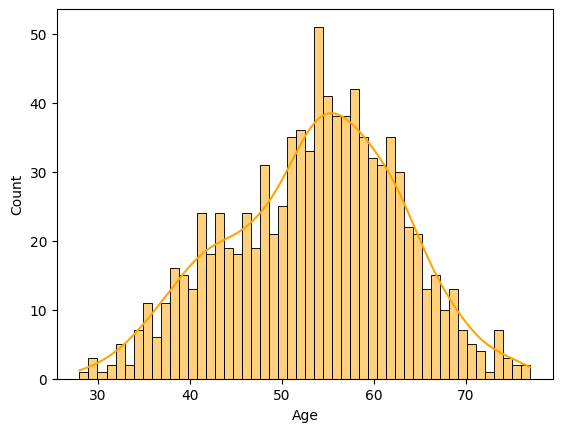

In [9]:
# outra biblioteca pra montar grafico:
import seaborn as sb

sb.histplot(dados, x = 'Age', bins = 50, color = "orange", kde = True, stat="count") # kde = tendencia

M    725
F    193
Name: Sex, dtype: int64
--


<Axes: xlabel='Sex', ylabel='count'>

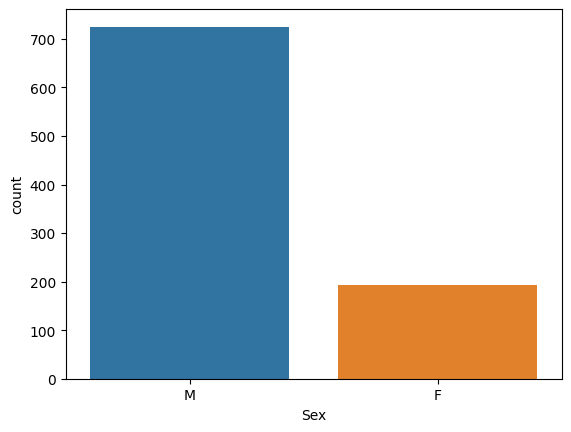

In [10]:
print(dados['Sex'].value_counts())
print("--")

sb.countplot(x = 'Sex', data = dados)

# Outros argumentos


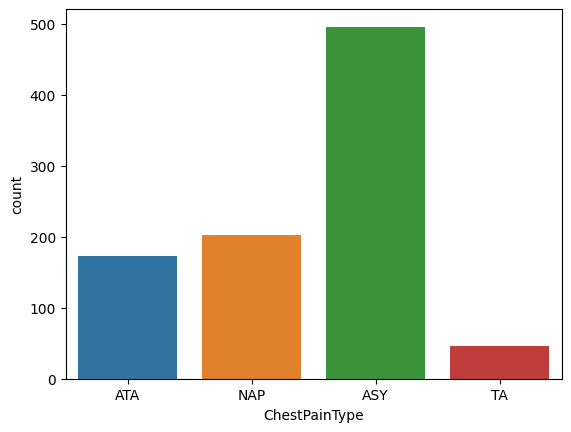

In [11]:
# Chest Pain Type: (angina: dor no peito causada pela diminuicao de fluxo de sangue no coracao)
## - ASY assintomático
## - NAP dor não anginosa
## - ATA angina atípica
## - TA  angina típica
dados['ChestPainType'].value_counts()

sb.countplot(x = 'ChestPainType', data = dados); # ; pra tirar aquela info de cima

0       1
80      1
92      1
94      2
95      6
       ..
180    12
185     1
190     2
192     1
200     4
Name: RestingBP, Length: 67, dtype: int64


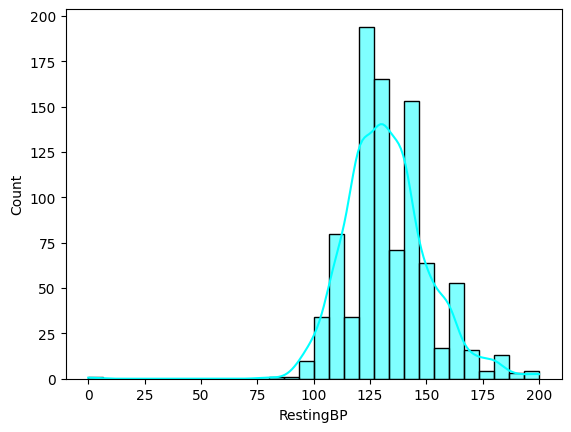

In [12]:
# Resting Blood Pressure
print(dados['RestingBP'].value_counts().sort_index())
# tem uma pressao sanguinea 0. impossível. precisa resolver
sb.histplot(dados, x = 'RestingBP', bins = 30, color = "cyan", kde = True, stat = 'count');

0      172
85       1
100      2
110      1
113      1
      ... 
491      1
518      1
529      1
564      1
603      1
Name: Cholesterol, Length: 222, dtype: int64


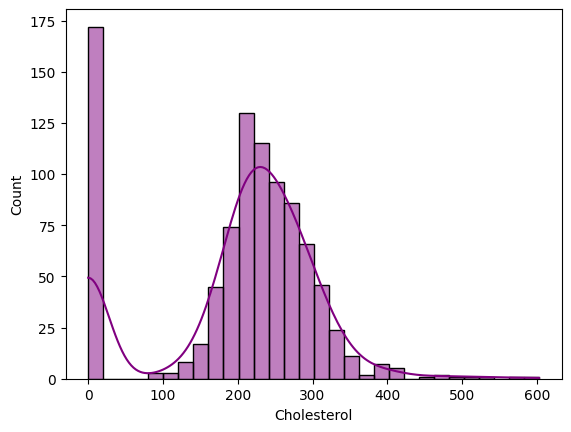

In [13]:
# Cholesterol
print(dados['Cholesterol'].value_counts().sort_index())
# cholesterol 0 tb é erro
sb.histplot(dados, x= 'Cholesterol', bins = 30, color = "purple", kde = True, stat = 'count');

0    704
1    214
Name: FastingBS, dtype: int64


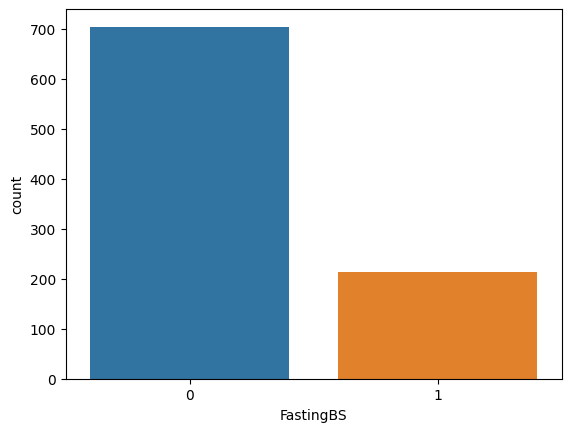

In [14]:
# Fasting Blood Sugar:
# 0: Fasting BS < 120mg/dl (nao diabetico)
# 1: Fasting BS >= 120mg/dl (diabetico)

print(dados['FastingBS'].value_counts().sort_index())

sb.countplot(x = 'FastingBS', data = dados);

Normal    552
LVH       188
ST        178
Name: RestingECG, dtype: int64


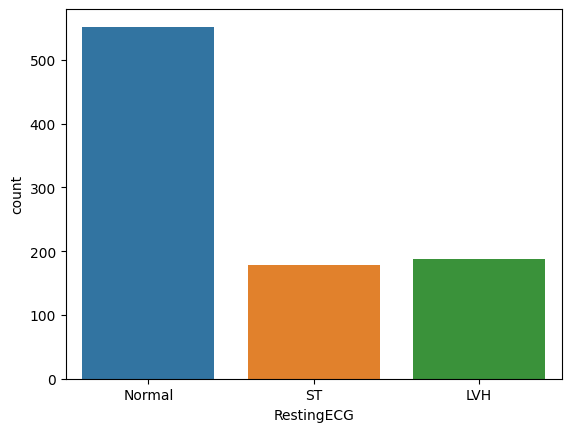

In [15]:
# Resting EletroCardioGram
# LVH = Left Ventricular Hipertrofy
# ST  = anormalidade da onda ST-T
print(dados['RestingECG'].value_counts())
sb.countplot(data = dados, x = 'RestingECG');

60     1
63     1
67     1
69     1
70     1
      ..
190    2
192    1
194    1
195    1
202    1
Name: MaxHR, Length: 119, dtype: int64


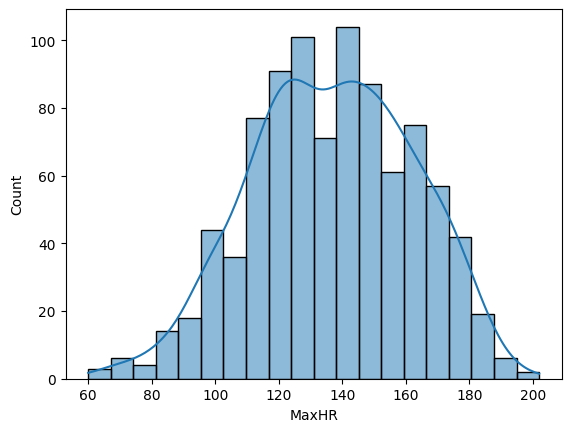

In [16]:
# Max Heart Rate
print(dados['MaxHR'].value_counts().sort_index())
sb.histplot(dados, x = 'MaxHR', kde = True);

In [17]:
# Exercise Angina: Angina (dor no peito) durante exercício
print(dados['ExerciseAngina'].value_counts())
px.pie(dados, 'ExerciseAngina')

N    547
Y    371
Name: ExerciseAngina, dtype: int64


-2.6      1
-2.0      1
-1.5      1
-1.1      1
-1.0      2
-0.9      1
-0.8      1
-0.7      1
-0.5      2
-0.1      2
 0.0    368
 0.1     14
 0.2     22
 0.3     11
 0.4     11
 0.5     19
 0.6     14
 0.7      7
 0.8     16
 0.9      4
 1.0     86
 1.1      7
 1.2     26
 1.3      7
 1.4     18
 1.5     53
 1.6     16
 1.7      6
 1.8     17
 1.9      7
 2.0     76
 2.1      2
 2.2      5
 2.3      2
 2.4      4
 2.5     16
 2.6      7
 2.8      7
 2.9      1
 3.0     28
 3.1      1
 3.2      2
 3.4      3
 3.5      2
 3.6      4
 3.7      1
 3.8      1
 4.0      8
 4.2      2
 4.4      1
 5.0      1
 5.6      1
 6.2      1
Name: Oldpeak, dtype: int64


<Axes: xlabel='Oldpeak', ylabel='Count'>

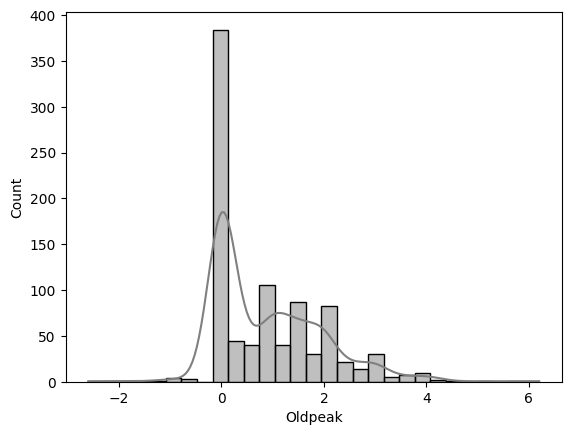

In [18]:
# Old Peak: queda do segmento da onda ST
print(dados['Oldpeak'].value_counts().sort_index())
sb.histplot(dados, x = 'Oldpeak', kde = True, color = "gray")

In [19]:
# ST_Slope = inclinação do segmento ST (upsloping, downsloping ou horizontal/plano (normal))
print(dados['ST_Slope'].value_counts())
px.pie(dados, 'ST_Slope')

Flat    460
Up      395
Down     63
Name: ST_Slope, dtype: int64


In [20]:
# nosso argumento alvo: se teve ou nao a doença
print(dados['HeartDisease'].value_counts())
px.pie(dados, 'HeartDisease')

1    508
0    410
Name: HeartDisease, dtype: int64


# Análise dos tipos de atributos

In [21]:
print(dados.dtypes) # tipos dos dados

Age                 int64
Sex                object
ChestPainType      object
RestingBP           int64
Cholesterol         int64
FastingBS           int64
RestingECG         object
MaxHR               int64
ExerciseAngina     object
Oldpeak           float64
ST_Slope           object
HeartDisease        int64
dtype: object


In [22]:
print(dados.isnull().sum())
# verifica se tem dado faltando. nao tem nenhum NAN, entao ta td certo vai dar 0 valores nulos pra tudo

Age               0
Sex               0
ChestPainType     0
RestingBP         0
Cholesterol       0
FastingBS         0
RestingECG        0
MaxHR             0
ExerciseAngina    0
Oldpeak           0
ST_Slope          0
HeartDisease      0
dtype: int64


In [23]:
dados2 = dados # copia pra manipular os nulos

In [24]:
# da pra excluir os valores faltantes usando:
dados2 = dados.dropna()
dados2.shape # vai ta igual pq n apagou nenhum

(918, 12)

In [25]:
# substitui pela media
dados2['Age'].fillna(dados2['Age'].mean(), inplace = True)
dados2.shape

(918, 12)

In [26]:
# substitui por qualquer outro valor
dados2['Age'].fillna(10, inplace = True)
dados2.shape

(918, 12)

# Análises Estatísticas Descritivas

In [27]:
dados.describe() # valores estatísticos
# std= desvio padrao

,Age,RestingBP,Cholesterol,FastingBS,MaxHR,Oldpeak,HeartDisease
count,918.000000,918.000000,918.000000,918.000000,918.000000,918.000000,918.000000
mean,53.510893,132.396514,198.799564,0.233115,136.809368,0.887364,0.553377
std,9.432617,18.514154,109.384145,0.423046,25.460334,1.066570,0.497414
min,28.000000,0.000000,0.000000,0.000000,60.000000,-2.600000,0.000000
25%,47.000000,120.000000,173.250000,0.000000,120.000000,0.000000,0.000000
50%,54.000000,130.000000,223.000000,0.000000,138.000000,0.600000,1.000000
75%,60.000000,140.000000,267.000000,0.000000,156.000000,1.500000,1.000000
max,77.000000,200.000000,603.000000,1.000000,202.000000,6.200000,1.000000


In [28]:
# nem tudo aparece, como a moda. mas tem um metodo so pra isso
dados.mode() # moda: o que mais apareceu

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
0,54,M,ASY,120,0,0,Normal,150,N,0.0,Flat,1


# Tratando valores incoerentes

In [29]:
# excluindo pressao 0:
dados2 = dados.loc[dados.RestingBP != 0]
# procura os dados onde RestingBP > x, < x, == x, != x.
# no nosso caso, queremos todos valores: exceto os que marcam 0

print(dados2.describe())



# cholesterol vamos pegar a media o inves de excluir
dados2['Cholesterol'].value_counts().sort_index()
# a distribuição é normal, então é interessante substituir pela media.

# o problema é: a média pegaria o 0.
# então vamos primeiro definir o 0 para NaN, para ele nao influenciar nos calculos

# da pra usar dados2.Cholesterol ao invés de dados2['Cholesterol']
print("\n", dados2.Cholesterol.mean(), "\n")

dados2.Cholesterol.replace(0, np.NaN, inplace = True)
print(dados2.isnull().sum(), "\n")

print(dados2.Cholesterol.mean())

dados2.Cholesterol.replace(np.NaN, dados2.Cholesterol.mean(), inplace = True)

              Age   RestingBP  Cholesterol   FastingBS       MaxHR  \
count  917.000000  917.000000   917.000000  917.000000  917.000000   
mean    53.509269  132.540894   199.016358    0.233370  136.789531   
std      9.437636   17.999749   109.246330    0.423206   25.467129   
min     28.000000   80.000000     0.000000    0.000000   60.000000   
25%     47.000000  120.000000   174.000000    0.000000  120.000000   
50%     54.000000  130.000000   223.000000    0.000000  138.000000   
75%     60.000000  140.000000   267.000000    0.000000  156.000000   
max     77.000000  200.000000   603.000000    1.000000  202.000000   

          Oldpeak  HeartDisease  
count  917.000000    917.000000  
mean     0.886696      0.552890  
std      1.066960      0.497466  
min     -2.600000      0.000000  
25%      0.000000      0.000000  
50%      0.600000      1.000000  
75%      1.500000      1.000000  
max      6.200000      1.000000  

 199.0163576881134 

Age                 0
Sex                

<ipython-input-29-79f147f0d977>:20: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

<ipython-input-29-79f147f0d977>:25: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



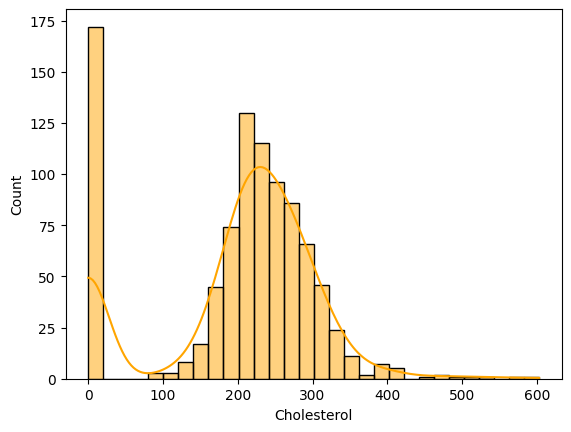

In [30]:
sb.histplot(dados , x = 'Cholesterol', bins = 30, kde = True, color = "orange");

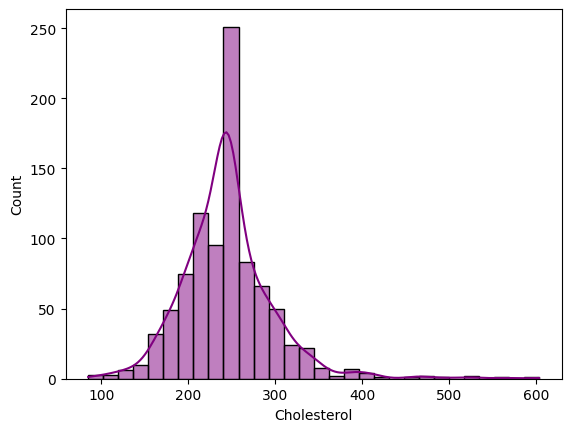

In [31]:
sb.histplot(dados2, x = 'Cholesterol', bins = 30, kde = True, color = "purple");

# Análise de Outliers

In [32]:
# idade:
px.box(dados2, y = 'Age')

In [33]:
# pressao sanguinea:
px.box(dados2, y = 'RestingBP')
# aqui os outliers sao diferentes: já que talvez sejam eles que identifiquem os problemas cardiacos

In [34]:
# cholesterol:
px.box(dados2, y = 'Cholesterol')
# aqui os outliers sao diferentes: já que talvez sejam eles que identifiquem os problemas cardiacos

# Exportando o dataframe tratado

In [35]:
dados2.to_csv('heart_tratado.csv', sep=";", encoding='utf-8', index = False)